### 라이브러리

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, Attention, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Bidirectional, MultiHeadAttention, LayerNormalization, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer

### 데이터 가져오기

In [55]:
# 최대 열을 제한하지 않고 전부 출력
pd.set_option('display.max_columns', None)
df = pd.read_csv('../database/train_data/cell2celltrain.csv')
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [56]:
len(df)

51047

In [57]:
# 피쳐들 확인
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

### 데이터 전처리

In [ ]:
# 결측치 채우기

nan_numeric_features = df.loc[:, df.isna().sum() > 0].select_dtypes(['int64', 'float64']).columns

imputer = KNNImputer(n_neighbors=10)
df_imputed = imputer.fit_transform(df[nan_numeric_features])
df_imputed = pd.DataFrame(df_imputed, columns=nan_numeric_features)
df = pd.concat([df_imputed, df.drop(columns=nan_numeric_features)], axis=1)

In [58]:
# 결측치 및 무한대 제거 (1295개)

df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [59]:
len(df)

49752

In [60]:
# 파생 변수 생성 - Age

medianage = np.median(df['AgeHH1'])

conditions = [
    (df['AgeHH1'] == 0) & (df['AgeHH2'] == 0),
    (df['AgeHH1'] > 0) & (df['AgeHH2'] == 0),
    (df['AgeHH1'] > 0) & (df['AgeHH2'])]

choices = [medianage, df['AgeHH1'], (df['AgeHH1'] + df['AgeHH2']) / 2]

df['Age'] = np.select(conditions, choices, default= (df['AgeHH1'] + df['AgeHH2']) / 2)

In [61]:
# 파생 변수 생성 - Division

states = pd.read_csv('../database/train_data/state_code.csv')
states['ServiceAreaNo'] = states['ServiceAreaNo'].astype(str)
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StateCode      241 non-null    object
 1   Division       241 non-null    object
 2   ServiceAreaNo  241 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


In [62]:
states = states.drop('StateCode', axis=1)
df['ServiceAreaNo'] = df['ServiceArea'].str.slice(start=6).astype('category')
df = pd.merge(df, states, on = 'ServiceAreaNo')

In [63]:
# 파생 변수 생성 - SubsRatio

df['SubsRatio'] = df['ActiveSubs'] / df['UniqueSubs']

In [64]:
len(df)

45051

### 최적의 피쳐들

In [65]:
# 중요도 높은 피쳐들

important = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeRevenues', 'UnansweredCalls',
             'CustomerCareCalls', 'ThreewayCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
             'UniqueSubs', 'SubsRatio', 'Handsets', 'CurrentEquipmentDays', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'BuysViaMailOrder', 'RespondsToMailOffers',
             'HasCreditCard', 'MadeCallToRetentionTeam','CreditRating', 'PrizmCode', 'MaritalStatus', 'Division', 'Age', 'Churn']

In [66]:
df = df[important]

In [67]:
# 데이터 타입

print(len(df.columns))
print()
numeric_cols = (df.select_dtypes(include=['number'])).columns
print(numeric_cols, len(numeric_cols))
print()
binary_cols = df.columns[df.nunique() == 2]
print(binary_cols, len(binary_cols))
print()
df_copy = df.copy()
df_copy = df_copy.drop(columns=list(numeric_cols) + list(binary_cols))
cat_cols = df_copy.columns
print(cat_cols, len(cat_cols))

32

Index(['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls',
       'OverageMinutes', 'RoamingCalls', 'PercChangeRevenues',
       'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'SubsRatio', 'Handsets', 'CurrentEquipmentDays', 'Age'],
      dtype='object') 20

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'HasCreditCard',
       'MadeCallToRetentionTeam', 'Churn'],
      dtype='object') 8

Index(['CreditRating', 'PrizmCode', 'MaritalStatus', 'Division'], dtype='object') 4


In [68]:
# 인코딩

# 바이너리

for feature in binary_cols :
    df[feature] = df[feature].replace({'Yes' : 1, 'No' : 0})


# 범주형

cat_onehot = list(cat_cols)
cat_onehot.remove('CreditRating')
cat_label = ['CreditRating']


# 원-핫 인코딩

df = pd.get_dummies(df, columns=cat_onehot)


# 라벨링

df['CreditRating'] = df['CreditRating'].replace(
    {'7-Lowest' : 0,
     '6-VeryLow' : 1,
     '5-Low' : 2,
     '4-Medium' : 3,
     '3-Good' : 4,
     '2-High' : 5,
     '1-Highest' : 6
     })

C:\Users\USER\AppData\Local\Temp\ipykernel_18788\1106135952.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].replace({'Yes' : 1, 'No' : 0})
C:\Users\USER\AppData\Local\Temp\ipykernel_18788\1106135952.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CreditRating'] = df['CreditRating'].replace(


In [69]:
df.columns

Index(['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls',
       'OverageMinutes', 'RoamingCalls', 'PercChangeRevenues',
       'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'SubsRatio', 'Handsets', 'CurrentEquipmentDays',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'HasCreditCard',
       'MadeCallToRetentionTeam', 'CreditRating', 'Age', 'Churn',
       'PrizmCode_Other', 'PrizmCode_Rural', 'PrizmCode_Suburban',
       'PrizmCode_Town', 'MaritalStatus_No', 'MaritalStatus_Unknown',
       'MaritalStatus_Yes', 'Division_midwest', 'Division_northeast',
       'Division_south', 'Division_west'],
      dtype='object')

In [70]:
len(df.columns)

40

In [71]:
# 피쳐 파일 저장

content = np.array(df.columns)

np.savetxt('feature.txt', content, fmt='%s', delimiter=', ')

### 샘플링

In [72]:
X = df.drop('Churn', axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 모델 선정

In [73]:
# 모델 리스트

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLP": MLPClassifier(max_iter=1000)
}


# 모델 학습 및 평가 결과 저장용 리스트 생성

results = []


# 모델 학습 및 평가

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if len(np.unique(y_test)) > 1 else np.nan
    f1 = f1_score(y_test, y_pred)

    # 결과 저장
    results.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc, 'F1 Score': f1})

    # 결과 출력
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*60)

Model: Logistic Regression
Accuracy: 0.7169, AUC: 0.6119, F1 Score: 0.0576
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      6453
           1       0.52      0.03      0.06      2558

    accuracy                           0.72      9011
   macro avg       0.62      0.51      0.45      9011
weighted avg       0.66      0.72      0.61      9011

Model: KNN
Accuracy: 0.6671, AUC: 0.5540, F1 Score: 0.2643
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      6453
           1       0.35      0.21      0.26      2558

    accuracy                           0.67      9011
   macro avg       0.54      0.53      0.52      9011
weighted avg       0.62      0.67      0.64      9011

Model: Decision Tree
Accuracy: 0.6107, AUC: 0.5300, F1 Score: 0.3336
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      6453
           1       0.32      0.34 

In [74]:
resultsOG = pd.DataFrame(results)
resultsOG

,Model,Accuracy,AUC,F1 Score
0,Logistic Regression,0.716902,0.611895,0.057628
1,KNN,0.667074,0.554016,0.264345
2,Decision Tree,0.610698,0.529979,0.333587
3,Random Forest,0.723005,0.648200,0.142268
4,Gradient Boosting,0.718011,0.661470,0.070932
5,XGBoost,0.708800,0.645998,0.242931
6,LightGBM,0.722450,0.660319,0.142024
7,CatBoost,0.725447,0.669463,0.192559
8,MLP,0.709355,0.600304,0.068303


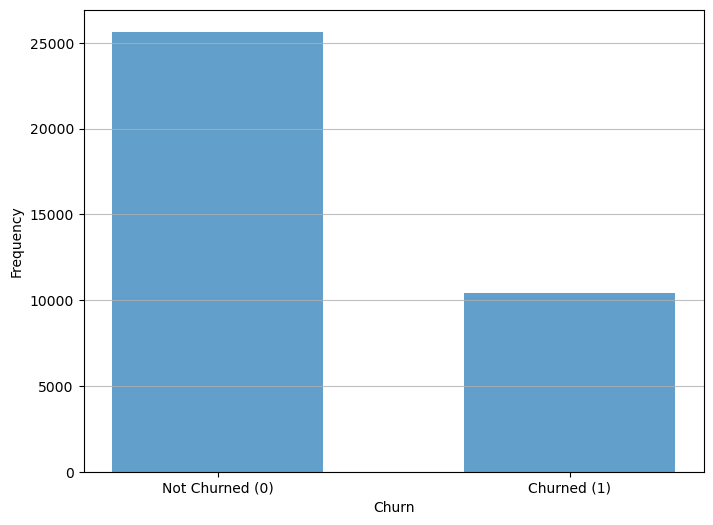

In [75]:
# 타겟 변수의 빈도 수 계산

churn_counts = y_train.value_counts()


# 막대의 위치 및 색상 설정

labels = ['Not Churned (0)', 'Churned (1)']
bars = np.arange(len(labels))


# 히스토그램 그리기

plt.figure(figsize=(8, 6))
plt.bar(bars, churn_counts, alpha=0.7, width=0.6)
plt.xticks(bars, labels)


# x축의 간격 조정

plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.8)
plt.show()

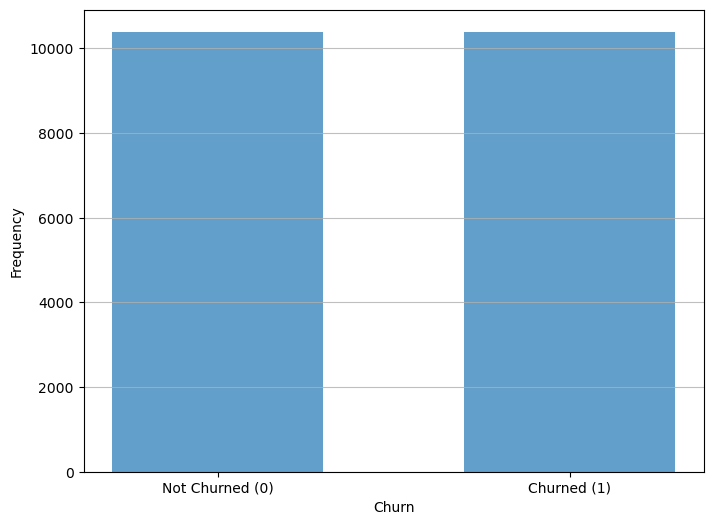

In [76]:
# 언더 샘플링

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

undersampler = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)

churn_counts_resampled = y_train_resampled.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(bars, churn_counts_resampled, alpha=0.7, width=0.6)
plt.xticks(bars, labels)
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.8)
plt.show()

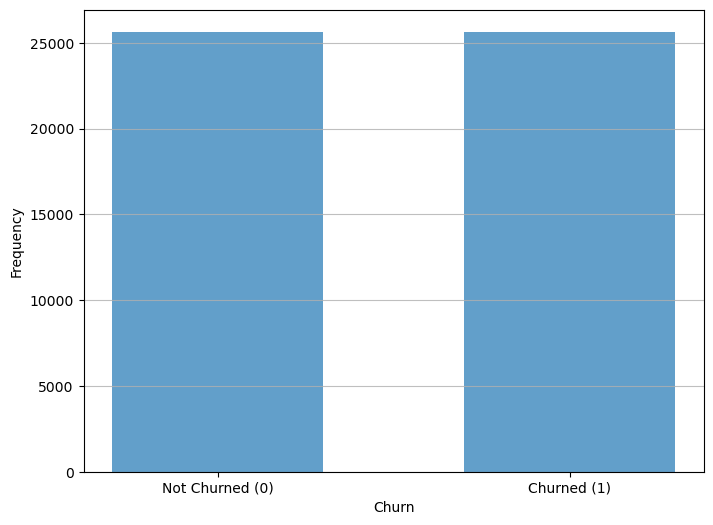

In [77]:
# 오버 샘플링 (SMOTE)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

churn_counts_resampled = y_train_resampled.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(bars, churn_counts_resampled, alpha=0.7, width=0.6)
plt.xticks(bars, labels)
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.8)
plt.show()

### 언더 샘플링

In [82]:
# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLP": MLPClassifier(max_iter=1000)
}

# 언더샘플링을 적용하기 위한 준비
undersampler = RandomUnderSampler(random_state=42)

# 학습 및 테스트 데이터에서 언더샘플링 적용
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)

# 모델 학습 및 평가 결과 저장용 리스트 생성
results = []

# 모델 학습 및 평가
for name, model in models.items():
    # 언더샘플링된 데이터를 사용해 모델 학습
    model.fit(x_train_resampled, y_train_resampled)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if len(np.unique(y_test)) > 1 else np.nan
    f1 = f1_score(y_test, y_pred)

    # 결과 저장
    results.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc, 'F1 Score': f1})

    # 결과 출력
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*60)

# 결과 리스트를 데이터프레임으로 변환하여 성능 확인
resultsUn = pd.DataFrame(results)
resultsUn.sort_values(by='F1 Score', ascending=False, inplace=True)

Model: Logistic Regression
Accuracy: 0.5806, AUC: 0.6113, F1 Score: 0.4374
              precision    recall  f1-score   support

           0       0.78      0.58      0.67      6453
           1       0.35      0.57      0.44      2558

    accuracy                           0.58      9011
   macro avg       0.56      0.58      0.55      9011
weighted avg       0.66      0.58      0.60      9011

Model: KNN
Accuracy: 0.5473, AUC: 0.5558, F1 Score: 0.4013
              precision    recall  f1-score   support

           0       0.75      0.55      0.64      6453
           1       0.32      0.53      0.40      2558

    accuracy                           0.55      9011
   macro avg       0.54      0.54      0.52      9011
weighted avg       0.63      0.55      0.57      9011

Model: Decision Tree
Accuracy: 0.5355, AUC: 0.5353, F1 Score: 0.3953
              precision    recall  f1-score   support

           0       0.74      0.54      0.62      6453
           1       0.31      0.53 

In [84]:
# 최종 결과 출력
print("\nFinal Model Results:")
resultsUn


Final Model Results:


,Model,Accuracy,AUC,F1 Score
7,CatBoost,0.601598,0.666017,0.486115
4,Gradient Boosting,0.585174,0.664127,0.485266
6,LightGBM,0.591832,0.660910,0.477260
5,XGBoost,0.594496,0.649184,0.470128
3,Random Forest,0.593941,0.641040,0.461991
8,MLP,0.425924,0.589333,0.452303
0,Logistic Regression,0.580624,0.611283,0.437398
1,KNN,0.547331,0.555763,0.401292
2,Decision Tree,0.535457,0.535256,0.395261


### 오버 샘플링

In [80]:
# 오버샘플링 적용 (train 데이터에만)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLP": MLPClassifier(max_iter=1000)
}

# 모델 학습 및 평가
results = []
for name, model in models.items():
    model.fit(x_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if len(np.unique(y_test)) > 1 else np.nan
    f1 = f1_score(y_test, y_pred)

    # 결과 저장
    results.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc, 'F1 Score': f1})

    # 결과 출력
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*60)

# 결과 리스트를 데이터프레임으로 변환하여 성능 확인
results_SM = pd.DataFrame(results)
results_SM.sort_values(by='F1 Score', ascending=False, inplace=True)

c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7151, AUC: 0.6048, F1 Score: 0.0939
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      6453
           1       0.48      0.05      0.09      2558

    accuracy                           0.72      9011
   macro avg       0.60      0.51      0.46      9011
weighted avg       0.65      0.72      0.62      9011

Model: KNN
Accuracy: 0.5442, AUC: 0.5474, F1 Score: 0.3886
              precision    recall  f1-score   support

           0       0.74      0.56      0.64      6453
           1       0.31      0.51      0.39      2558

    accuracy                           0.54      9011
   macro avg       0.53      0.53      0.51      9011
weighted avg       0.62      0.54      0.57      9011

Model: Decision Tree
Accuracy: 0.6053, AUC: 0.5331, F1 Score: 0.3451
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6453
           1       0.33      0.37 

In [85]:
# 최종 결과 출력
print("\nFinal Model Results:")
results_SM


Final Model Results:


,Model,Accuracy,AUC,F1 Score
1,KNN,0.544224,0.547411,0.388566
2,Decision Tree,0.605260,0.533143,0.345056
5,XGBoost,0.713572,0.647152,0.262361
7,CatBoost,0.724226,0.665325,0.220759
3,Random Forest,0.709244,0.629429,0.183292
6,LightGBM,0.718899,0.662008,0.131642
8,MLP,0.714460,0.609656,0.125128
0,Logistic Regression,0.715126,0.604807,0.093893
4,Gradient Boosting,0.716569,0.644170,0.070597


### LSTM, GRU, CNN, Transformer 모델

In [89]:
# 학습용 데이터와 테스트 데이터로 80:20 비율로 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 언더샘플링 적용 (Churn 비율을 맞추기 위해 RandomUnderSampler 사용)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
train_x_resampled, train_y_resampled = undersampler.fit_resample(train_x, train_y)

# 스케일링 (숫자형 변수만)
scaler = StandardScaler()
train_x_resampled[numeric_cols] = scaler.fit_transform(train_x_resampled[numeric_cols])
test_x[numeric_cols] = scaler.transform(test_x[numeric_cols])

# 데이터 타입을 float32로 변환 (텐서플로우 호환을 위해)
train_x_resampled = train_x_resampled.astype('float32')
test_x = test_x.astype('float32')

# 데이터를 LSTM/GRU 입력 형식으로 변환 (샘플 수, 타임스텝, 특성 수)
train_x_resampled = np.expand_dims(train_x_resampled, axis=1)
test_x = np.expand_dims(test_x, axis=1)

# 3. 모델 정의

# 1. LSTM + Attention 모델
def build_lstm_attention_model(input_shape):
    inputs = Input(shape=input_shape)
    lstm_out = LSTM(64, return_sequences=True)(inputs)
    attention = Attention()([lstm_out, lstm_out])
    flatten = Flatten()(attention)
    dense_out = Dense(64, activation='relu')(flatten)
    outputs = Dense(1, activation='sigmoid')(dense_out)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 2. BiLSTM + CNN 모델
def build_bilstm_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    lstm_out = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    cnn_out = Conv1D(64, kernel_size=1, activation='relu')(lstm_out)
    cnn_out = MaxPooling1D(pool_size=1)(cnn_out)
    cnn_out = GlobalAveragePooling1D()(cnn_out)
    dense_out = Dense(64, activation='relu')(cnn_out)
    outputs = Dense(1, activation='sigmoid')(dense_out)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. GRU + Attention 모델
def build_gru_attention_model(input_shape):
    inputs = Input(shape=input_shape)
    gru_out = GRU(64, return_sequences=True)(inputs)
    attention = Attention()([gru_out, gru_out])
    flatten = Flatten()(attention)
    dense_out = Dense(64, activation='relu')(flatten)
    outputs = Dense(1, activation='sigmoid')(dense_out)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 4. Transformer 모델
def build_transformer_model(input_shape, num_heads=8, ff_dim=64):
    inputs = Input(shape=input_shape)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dense(input_shape[-1])(ff_output)
    ff_output = LayerNormalization(epsilon=1e-6)(ff_output)
    dense_out = Dense(64, activation='relu')(ff_output)
    dense_out = Dropout(0.1)(dense_out)
    outputs = Dense(1, activation='sigmoid')(dense_out)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 4. 모델 리스트 정의
models = {
    'LSTM + Attention': build_lstm_attention_model((1, train_x_resampled.shape[2])),
    'BiLSTM + CNN': build_bilstm_cnn_model((1, train_x_resampled.shape[2])),
    'GRU + Attention': build_gru_attention_model((1, train_x_resampled.shape[2])),
    'Transformer': build_transformer_model((1, train_x_resampled.shape[2]))
}

# 5. 모델 학습 및 평가 결과 저장용 리스트 생성
results = []

# 6. 모델 학습 및 평가
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")
    model.fit(train_x_resampled, train_y_resampled, epochs=10, batch_size=64, validation_split=0.2)

    # 테스트 데이터 평가
    test_loss, test_accuracy = model.evaluate(test_x, test_y)
    y_pred_proba = model.predict(test_x).ravel()
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)

    # 성능 지표 계산
    accuracy = accuracy_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, y_pred_proba)
    f1 = classification_report(test_y, y_pred, output_dict=True)['weighted avg']['f1-score']

    # 결과 저장
    results.append({'Model': model_name, 'Accuracy': accuracy, 'AUC': roc_auc, 'F1 Score': f1})

    # 결과 출력
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(test_y, y_pred))
    print("="*60)

# 7. 결과 리스트를 데이터프레임으로 변환하여 성능 확인
results_df1 = pd.DataFrame(results)
results_df1.sort_values(by='F1 Score', ascending=False, inplace=True)


=== LSTM + Attention ===
Epoch 1/10


c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6022 - loss: 0.6641 - val_accuracy: 0.1141 - val_loss: 0.9657
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6348 - loss: 0.6410 - val_accuracy: 0.1476 - val_loss: 0.9018
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6387 - loss: 0.6353 - val_accuracy: 0.1457 - val_loss: 0.9775
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6380 - loss: 0.6353 - val_accuracy: 0.1742 - val_loss: 0.9452
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6385 - loss: 0.6333 - val_accuracy: 0.1662 - val_loss: 0.9615
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6501 - loss: 0.6251 - val_accuracy: 0.2854 - val_loss: 0.9018
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6514 - loss: 0.6272 - val_accuracy: 0.3303 - val_loss: 0.8656
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6460 - loss: 0.6281 - val_accuracy: 0.1875 - val_

c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model: LSTM + Attention
Accuracy: 0.6866, ROC-AUC: 0.6199, F1 Score: 0.6568
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      6420
           1       0.42      0.24      0.31      2591

    accuracy                           0.69      9011
   macro avg       0.58      0.55      0.55      9011
weighted avg       0.65      0.69      0.66      9011


=== BiLSTM + CNN ===
Epoch 1/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6208 - loss: 0.6551 - val_accuracy: 0.0396 - val_loss: 0.9946
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6255 - loss: 0.6433 - val_accuracy: 0.1421 - val_loss: 0.9615
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6289 - loss: 0.6388 - val_accuracy: 0.1312 - val_loss: 0.9653
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6405 - loss: 0.6328 - val_accuracy: 0.2343 - val_loss: 0.8988
Epoch 5/10
260/260 ━━━

c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6186 - loss: 0.6609 - val_accuracy: 0.1390 - val_loss: 0.9727
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6255 - loss: 0.6485 - val_accuracy: 0.1455 - val_loss: 0.9298
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6364 - loss: 0.6380 - val_accuracy: 0.1563 - val_loss: 0.9451
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6293 - loss: 0.6401 - val_accuracy: 0.1397 - val_loss: 0.9781
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6433 - loss: 0.6311 - val_accuracy: 0.1551 - val_loss: 0.9566
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6388 - loss: 0.6313 - val_accuracy: 0.1812 - val_loss: 0.9714
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6515 - loss: 0.6241 - val_accuracy: 0.1626 - val_loss: 0.9544
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6464 - loss: 0.6237 - val_accuracy: 0.1978 - val_

c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model: GRU + Attention
Accuracy: 0.7025, ROC-AUC: 0.6195, F1 Score: 0.6421
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      6420
           1       0.44      0.14      0.21      2591

    accuracy                           0.70      9011
   macro avg       0.59      0.53      0.51      9011
weighted avg       0.65      0.70      0.64      9011


=== Transformer ===
Epoch 1/10


c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6065 - loss: 0.6680 - val_accuracy: 0.0326 - val_loss: 0.8831
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6267 - loss: 0.6507 - val_accuracy: 0.1723 - val_loss: 0.9637
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6219 - loss: 0.6459 - val_accuracy: 0.2285 - val_loss: 0.8659
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6356 - loss: 0.6409 - val_accuracy: 0.0290 - val_loss: 0.9351
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6291 - loss: 0.6456 - val_accuracy: 0.0372 - val_loss: 1.0858
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6385 - loss: 0.6386 - val_accuracy: 0.2393 - val_loss: 0.9399
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6273 - loss: 0.6412 - val_accuracy: 0.0729 - val_loss: 0.9558
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6367 - loss: 0.6379 - val_accuracy: 0.0676

c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model: Transformer
Accuracy: 0.7109, ROC-AUC: 0.6136, F1 Score: 0.6226
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      6420
           1       0.48      0.07      0.12      2591

    accuracy                           0.71      9011
   macro avg       0.60      0.52      0.47      9011
weighted avg       0.65      0.71      0.62      9011



In [91]:
results_df1

,Model,Accuracy,AUC,F1 Score
1,BiLSTM + CNN,0.694706,0.621330,0.658681
0,LSTM + Attention,0.686605,0.619870,0.656821
2,GRU + Attention,0.702475,0.619522,0.642114
3,Transformer,0.710909,0.613646,0.622560


###언더샘플링,10-fold
*   Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
*   Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
나머지 추가하기


In [93]:
# 언더샘플링 적용 (다수 클래스의 샘플을 줄여서 클래스 비율 맞춤)
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# 언더샘플링 후 클래스 분포 확인
print("\n언더샘플링 후 클래스 분포:")
print(pd.Series(y_resampled).value_counts())

# 스케일링 (숫자형 변수만)
scaler = StandardScaler()
X_resampled[numeric_cols] = scaler.fit_transform(X_resampled[numeric_cols])

# 10-fold 교차 검증 설정
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 모델 리스트 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLP": MLPClassifier(max_iter=1000)
}

# 모델 학습 및 평가 결과 저장용 리스트 생성
results = []

# 각 모델에 대해 학습 및 평가
for model_name, classifier in models.items():
    print(f"\n=== {model_name} ===")

    # 교차 검증 정확도, ROC-AUC, F1 Score 저장용 리스트
    accuracy_list = []
    roc_auc_list = []
    f1_list = []
    detailed_results = []
    fold = 1

    # 각 폴드별로 학습 및 평가
    for train_index, test_index in kf.split(X_resampled, y_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        # 모델 학습
        classifier.fit(X_train, y_train)

        # 예측 생성
        y_pred = classifier.predict(X_test)
        y_pred_proba = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else np.zeros(len(y_test))

        # 평가 지표 계산
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else np.nan
        f1 = f1_score(y_test, y_pred)

        # 세부 평가 지표 출력
        report = classification_report(y_test, y_pred, output_dict=True)
        detailed_report = classification_report(y_test, y_pred)

        # 리스트에 저장
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        f1_list.append(f1)

        # 폴드 결과 출력
        print(f"Fold {fold} - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}, F1 Score: {f1:.4f}")
        print(f"Detailed Classification Report for Fold {fold}:\n{detailed_report}")
        fold += 1

    # 평균 지표 계산
    avg_accuracy = np.mean(accuracy_list)
    avg_roc_auc = np.mean(roc_auc_list)
    avg_f1 = np.mean(f1_list)

    # 결과 저장
    results.append({'Model': model_name, 'Accuracy': avg_accuracy, 'AUC': avg_roc_auc, 'F1 Score': avg_f1})

    # 결과 출력
    print(f"\nModel: {model_name}")
    print(f"Average Accuracy: {avg_accuracy:.4f}, Average ROC-AUC: {avg_roc_auc:.4f}, Average F1 Score: {avg_f1:.4f}")
    print("="*60)

# 결과 리스트를 데이터프레임으로 변환하여 성능 확인
results_10U = pd.DataFrame(results)
results_10U.sort_values(by='F1 Score', ascending=False, inplace=True)


언더샘플링 후 클래스 분포:
Churn
0    12952
1    12952
Name: count, dtype: int64

=== Logistic Regression ===
Fold 1 - Accuracy: 0.5681, ROC-AUC: 0.6059, F1 Score: 0.5593
Detailed Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1296
           1       0.57      0.55      0.56      1295

    accuracy                           0.57      2591
   macro avg       0.57      0.57      0.57      2591
weighted avg       0.57      0.57      0.57      2591

Fold 2 - Accuracy: 0.5770, ROC-AUC: 0.6113, F1 Score: 0.5768
Detailed Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1296
           1       0.58      0.58      0.58      1295

    accuracy                           0.58      2591
   macro avg       0.58      0.58      0.58      2591
weighted avg       0.58      0.58      0.58      2591

Fold 3 - Accuracy: 0.5646, ROC-AUC: 0.

In [94]:
results_10U

,Model,Accuracy,AUC,F1 Score
4,Gradient Boosting,0.612685,0.658030,0.631258
6,LightGBM,0.616855,0.661019,0.630557
7,CatBoost,0.617472,0.663744,0.628489
3,Random Forest,0.604926,0.645615,0.610233
5,XGBoost,0.598826,0.638249,0.605362
0,Logistic Regression,0.574120,0.606639,0.569461
8,MLP,0.568831,0.596351,0.562171
2,Decision Tree,0.543584,0.543585,0.544037
1,KNN,0.533082,0.544472,0.522575


###10-fold 딥러닝

In [96]:
# 언더샘플링 적용 (다수 클래스의 샘플을 줄여서 클래스 비율 맞춤)
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# 언더샘플링 후 클래스 분포 확인
print("\n언더샘플링 후 클래스 분포:")
print(pd.Series(y_resampled).value_counts())

# 스케일링 (숫자형 변수만)
scaler = StandardScaler()
X_resampled[numeric_cols] = scaler.fit_transform(X_resampled[numeric_cols])

# 데이터를 신경망 모델 입력에 맞게 변환하고 float32로 변환
X_resampled_nn = np.expand_dims(X_resampled.astype('float32'), axis=1)  # CNN, RNN 모델용 데이터 변환

# 10-fold 교차 검증 설정
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 신경망 모델 정의
def build_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dnn_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 수정된 CNN 모델
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=1, activation='relu', input_shape=input_shape, padding='same'))  # 수정된 부분
    model.add(Flatten())  # MaxPooling1D 제거
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, return_sequences=False, input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_slp_model(input_shape):
    model = Sequential()
    model.add(Dense(1, activation='sigmoid', input_shape=input_shape))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_mlp_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 모델 리스트 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLP_Sklearn": MLPClassifier(max_iter=1000),
    "ANN": build_ann_model((1, X_resampled.shape[1])),
    "DNN": build_dnn_model((1, X_resampled.shape[1])),
    "CNN": build_cnn_model((1, X_resampled_nn.shape[2])),
    "RNN": build_rnn_model((1, X_resampled_nn.shape[2])),
    "SLP": build_slp_model((1, X_resampled.shape[1])),
    "MLP_NN": build_mlp_model((1, X_resampled.shape[1]))
}

# 모델 학습 및 평가 결과 저장용 리스트 생성
results = []

# 각 모델에 대해 학습 및 평가
for model_name, classifier in models.items():
    print(f"\n=== {model_name} ===")

    accuracy_list = []
    roc_auc_list = []
    f1_list = []

    for train_index, test_index in kf.split(X_resampled, y_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        if model_name in ['ANN', 'DNN', 'CNN', 'RNN', 'SLP', 'MLP_NN']:
            X_train_nn, X_test_nn = np.expand_dims(X_train.astype('float32'), axis=1), np.expand_dims(X_test.astype('float32'), axis=1)
            classifier.fit(X_train_nn, y_train, epochs=10, batch_size=64, verbose=0)
            y_pred_proba = classifier.predict(X_test_nn).ravel()
            y_pred = np.where(y_pred_proba > 0.5, 1, 0)
        else:
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            y_pred_proba = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else np.zeros(len(y_test))

        # 평가 지표 계산
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else np.nan
        f1 = f1_score(y_test, y_pred)

        # 리스트에 저장
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        f1_list.append(f1)

    # 평균 지표 계산
    avg_accuracy = np.mean(accuracy_list)
    avg_roc_auc = np.mean(roc_auc_list)
    avg_f1 = np.mean(f1_list)

    # 결과 저장
    results.append({'Model': model_name, 'Accuracy': avg_accuracy, 'AUC': avg_roc_auc, 'F1 Score': avg_f1})

# 결과 출력
results_df_total = pd.DataFrame(results)
results_df_total.sort_values(by='F1 Score', ascending=False, inplace=True)


언더샘플링 후 클래스 분포:
Churn
0    12952
1    12952
Name: count, dtype: int64


c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USER\miniconda3\envs\AIproject\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__i


=== Logistic Regression ===

=== KNN ===

=== Decision Tree ===

=== Random Forest ===

=== Gradient Boosting ===

=== XGBoost ===

=== LightGBM ===
[LightGBM] [Info] Number of positive: 11657, number of negative: 11656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3039
[LightGBM] [Info] Number of data points in the train set: 23313, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500021 -> initscore=0.000086
[LightGBM] [Info] Start training from score 0.000086
[LightGBM] [Info] Number of positive: 11657, number of negative: 11656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3039
[LightGBM] [Info] Number of data points in the train set: 23313, number of used features: 3

In [97]:
results_df_total

,Model,Accuracy,AUC,F1 Score
10,DNN,0.721716,0.799055,0.723026
9,ANN,0.645311,0.701373,0.653069
14,MLP_NN,0.643496,0.702019,0.650809
11,CNN,0.634771,0.691323,0.645505
12,RNN,0.642184,0.701702,0.638481
4,Gradient Boosting,0.612724,0.658083,0.631309
6,LightGBM,0.616855,0.661019,0.630557
7,CatBoost,0.617472,0.663744,0.628489
3,Random Forest,0.606663,0.645126,0.610776
5,XGBoost,0.598826,0.638249,0.605362
